<a href="https://colab.research.google.com/github/julianovale/PO240_Meta_heuristica/blob/main/PO240_Semana07_NSGA2_Portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload() # subir arquivo cotacoes.xlsx

Saving cotacoes.xlsx to cotacoes.xlsx


In [ ]:
# Program Name: NSGA-II.py
# Description: This is a python implementation of Prof. Kalyanmoy Deb's popular NSGA-II algorithm
# Author: Haris Ali Khan 
# Supervisor: Prof. Manoj Kumar Tiwari

#Importing required modules
import math
import random
import matplotlib.pyplot as plt

#Function to find index of list
def index_of(a,list):
    for i in range(0,len(list)):
        if list[i] == a:
            return i
    return -1

#Function to sort by values
def sort_by_values(list1, values):
    sorted_list = []
    while(len(sorted_list)!=len(list1)):
        if index_of(min(values),values) in list1:
            sorted_list.append(index_of(min(values),values))
        values[index_of(min(values),values)] = math.inf
    return sorted_list

#Function to carry out NSGA-II's fast non dominated sort
def fast_non_dominated_sort(values1, values2):   # dois objetivos de maximização
    S=[[] for i in range(0,len(values1))]
    front = [[]]
    n=[0 for i in range(0,len(values1))]
    rank = [0 for i in range(0, len(values1))]

    for p in range(0,len(values1)):
        S[p]=[]
        n[p]=0
        for q in range(0, len(values1)):
            if (values1[p] > values1[q] and values2[p] > values2[q]) or (values1[p] >= values1[q] and values2[p] > values2[q]) or (values1[p] > values1[q] and values2[p] >= values2[q]):
                if q not in S[p]:
                    S[p].append(q) # p domina q
            elif (values1[q] > values1[p] and values2[q] > values2[p]) or (values1[q] >= values1[p] and values2[q] > values2[p]) or (values1[q] > values1[p] and values2[q] >= values2[p]):
                n[p] = n[p] + 1  # q domina p
        if n[p]==0:
            rank[p] = 0
            if p not in front[0]:
                front[0].append(p)

    i = 0
    while(front[i] != []):
        Q=[]
        for p in front[i]:
            for q in S[p]:
                n[q] =n[q] - 1
                if( n[q]==0):
                    rank[q]=i+1
                    if q not in Q:
                        Q.append(q)
        i = i+1
        front.append(Q)

    del front[len(front)-1]
    return front

#Function to calculate crowding distance
def crowding_distance(values1, values2, front):
    distance = [0 for i in range(0,len(front))]
    sorted1 = sort_by_values(front, values1[:])
    sorted2 = sort_by_values(front, values2[:])
    distance[0] = 4444444444444444
    distance[len(front) - 1] = 4444444444444444
    for k in range(1,len(front)-1):
        distance[k] = distance[k]+ (values1[sorted1[k+1]] - values2[sorted1[k-1]])/(max(values1)-min(values1))
    for k in range(1,len(front)-1):
        distance[k] = distance[k]+ (values1[sorted2[k+1]] - values2[sorted2[k-1]])/(max(values2)-min(values2))
    return distance

In [ ]:
import numpy as np
# from nsgaII import fast_non_dominated_sort
# from nsgaII import crowding_distance
# from nsgaII import sort_by_values
# from nsgaII import index_of
import random
import matplotlib.pyplot as plt
import pandas as pd
       
# sobre esta função: Author: Haris Ali Khan     
def geneticoMultiobjetivo(populacao, TAM_POP, GERACOES, retATIVOS, covATIVOS, ATIVOS):
    gen_no = 0   # geração número 0
    while(gen_no < GERACOES):
        # function1_values é uma lista com todos os valores de f1 (retorno) de todos os indivíduos
        function1_values = [function1(populacao[i], retATIVOS, ATIVOS) for i in range(TAM_POP)]
        # function2_values é uma lista com todos os valores de f2 (-risco) de todos os indivíduos
        function2_values = [function2(populacao[i], covATIVOS, ATIVOS) for i in range(TAM_POP)]
        non_dominated_sorted_solution = fast_non_dominated_sort(function1_values[:],function2_values[:])
        crowding_distance_values=[]
        for i in range(0,len(non_dominated_sorted_solution)):
            crowding_distance_values.append(crowding_distance(function1_values[:],function2_values[:],non_dominated_sorted_solution[i][:]))
        # montando a população mista (solution2): população atual + filhos
        solution2 = populacao[:]  # copia população atual toda
        # gerando os filhos
        while(len(solution2) != 2*TAM_POP):
            pai1 = random.randint(0,TAM_POP-1)  # seleciona um índice
            pai2 = random.randint(0,TAM_POP-1)
            # coloca na mista os filhos gerados no crossover
            filho1, filho2 = crossoverMutacao(populacao[pai1], populacao[pai2], ATIVOS)
            solution2.append(filho1)
            solution2.append(filho2)
        # avalia a população mista toda
        function1_values2 = [function1(solution2[i], retATIVOS, ATIVOS)for i in range(0,2*TAM_POP)]
        function2_values2 = [function2(solution2[i], covATIVOS, ATIVOS)for i in range(0,2*TAM_POP)]
        non_dominated_sorted_solution2 = fast_non_dominated_sort(function1_values2[:],function2_values2[:])
        crowding_distance_values2=[]
        for i in range(0,len(non_dominated_sorted_solution2)):
            crowding_distance_values2.append(crowding_distance(function1_values2[:],function2_values2[:],non_dominated_sorted_solution2[i][:]))
        new_solution= []
        for i in range(0,len(non_dominated_sorted_solution2)):
            non_dominated_sorted_solution2_1 = [index_of(non_dominated_sorted_solution2[i][j],non_dominated_sorted_solution2[i] ) for j in range(0,len(non_dominated_sorted_solution2[i]))]
            front22 = sort_by_values(non_dominated_sorted_solution2_1[:], crowding_distance_values2[i][:])
            front = [non_dominated_sorted_solution2[i][front22[j]] for j in range(0,len(non_dominated_sorted_solution2[i]))]
            front.reverse()
            for value in front:
                new_solution.append(value)
                if(len(new_solution)==TAM_POP):
                    break
            if (len(new_solution) == TAM_POP):
                break
        populacao = [solution2[i] for i in new_solution]
        gen_no = gen_no + 1
    #Lets plot the final front now
    # function1_values é uma lista com todos os valores de f1 (retorno) de todos os indivíduos
    function1_values = [function1(populacao[i], retATIVOS, ATIVOS) for i in range(TAM_POP)]
    # function2_values é uma lista com todos os valores de f2 (-risco) de todos os indivíduos
    function2_values = [function2(populacao[i], covATIVOS, ATIVOS) for i in range(TAM_POP)]
    non_dominated_sorted_solution = fast_non_dominated_sort(function1_values[:],function2_values[:])
    pontos_function1 = []
    pontos_function2 = []
    for indiceIndiv in non_dominated_sorted_solution[0]:  # somente primeira fronteira
        pontos_function1.append(function1_values[indiceIndiv])
        pontos_function2.append(-function2_values[indiceIndiv])
    return pontos_function1, pontos_function2

# coletar tabela de preços, conforme o exemplo
def leitura(arquivo):
    ARQ = pd.read_excel(arquivo, sheet_name='Valores')#abre o arquivo para leitura, na aba Valores
    ATIVOS = ARQ.at[0,'Qtde']
    PERIODOS = ARQ.at[1,'Qtde']
    ARQ = pd.read_excel(arquivo, sheet_name='Planilha')
    Preco = []
    for i in range(ATIVOS):  # coluna
        nomecoluna = "Acao"+str(i+1)
        PrecoI = []  # uma coluna de inputs
        for t in range(PERIODOS):  # linha
            PrecoIK = ARQ.at[t, nomecoluna]   # um número de input
            PrecoI.append(PrecoIK)   # coloco um número de input na coluna
        Preco.append(PrecoI)    # coloco a coluna em x
    return ATIVOS, PERIODOS, Preco

# calcula o retorno (maximização)
def function1(x, retATIVOS, ATIVOS):
    total = 0
    for i in range(ATIVOS):
        total = total + retATIVOS[i]*x[i]
    return total
    
# calcula o risco (minimização risco = - maximização (- risco))
def function2(x, covATIVOS, ATIVOS):
    total = 0
    for i in range(ATIVOS):
        for j in range(ATIVOS):
            total = total + covATIVOS[i][j]*x[i]*x[j]
    return -total   # trocar sinal para problema ter apenas objetivos de max

def preProcessamento(ATIVOS, PERIODOS, Preco):
    # criar a matriz r de retornos
    r = []
    for i in range (ATIVOS):  # para cada linha
        crialinha = []        
        for t in range (PERIODOS):  # para cada coluna
            crialinha.append(0)     # preencho a linha com 0s em todas as colunas
        r.append(crialinha)
    # calculo do r    
    for i in range (ATIVOS):
        for t in range (1, PERIODOS):  
            r[i][t-1] = (Preco[i][t]/Preco[i][t-1]) - 1
  
    # criar o vetor retATIVOS
    retATIVOS = []
    for i in range (ATIVOS):
        retATIVOS.append(0)  
    # calculo
    for i in range (ATIVOS):
        for t in range (PERIODOS-1):  
            retATIVOS[i] = retATIVOS[i] + r[i][t]  
        retATIVOS[i] = retATIVOS[i]/(PERIODOS - 1)

    # criar a matriz covATIVOS
    covATIVOS = []
    for i in range (ATIVOS):        # para cada linha
        crialinha = []        
        for j in range (ATIVOS):    # para cada coluna
            crialinha.append(0)     # preencho a linha com 0s em todas as colunas
        covATIVOS.append(crialinha)
    # calculo
    for i in range(ATIVOS):
        for j in range (ATIVOS):
            for t in range (PERIODOS):
                covATIVOS[i][j] = covATIVOS[i][j] + (r[i][t] - retATIVOS[i])*(r[j][t] - retATIVOS[j])
    return retATIVOS, covATIVOS

def inicializaPopulacao(TAM_POP, ATIVOS):
    populacao = []
    for j in range (TAM_POP):
        x = []
        for i in range (ATIVOS):
            aleatorio = random.random()
            if aleatorio <= 0.1:
                aleatorio = 0
            x.append(aleatorio)  # preenchendo a i-ésima posição com o aletorio
        populacao.append(x)
    normalizarPopulacao(populacao, TAM_POP, ATIVOS) # somatório x[i] = 1
        
    return populacao

def normalizarPopulacao(populacao, TAM_POP, ATIVOS):
    for j in range (TAM_POP):
        populacao[j] = normalizarSolucao(populacao[j], ATIVOS)

def normalizarSolucao(x, ATIVOS):
    soma = 0
    for i in range (ATIVOS):
        if x[i] <= 0.01:
            x[i] = 0
        soma = soma + x[i] #está somando todos os valores de x
    if soma < 1 or soma > 1:
        for i in range (ATIVOS):
            x[i] = x[i]/soma
    return x
                
def crossoverMutacao(pai1, pai2, ATIVOS):
    PC = 0.9
    prob = random.random()
    if prob < PC:
        alpha = random.random()
        filho1 = []
        filho2 = []
        for i in range (ATIVOS):
            filho1.append(alpha*pai1[i] + (1-alpha)*pai2[i])
            filho2.append(alpha*pai2[i] + (1-alpha)*pai1[i])
    else:
        filho1 = pai1.copy()
        filho2 = pai2.copy()
        
    # mutação    
    filho1m = mutacao(filho1, ATIVOS)
    filho2m = mutacao(filho2, ATIVOS)
    
    filho1mn = normalizarSolucao(filho1m, ATIVOS)
    filho2mn = normalizarSolucao(filho2m, ATIVOS)
    
    return filho1mn, filho2mn
    
def mutacao(x, ATIVOS):
    PM = 0.1
    for i in range (ATIVOS):
        prob = random.random()
        if prob < PM:
            x[i] = np.random.normal(x[i],0.1)
    return x

def imprimeRodadas(matriz3D):
    plt.xlabel('Retorno', fontsize=15)
    plt.ylabel('Risco', fontsize=15)
    xmin = matriz3D[0][0][0]
    xmax = matriz3D[0][0][0]
    ymin = matriz3D[0][1][0]
    ymax = matriz3D[0][1][0]
    for fronteira in matriz3D:
        pontos_function1 = fronteira[0]
        pontos_function2 = fronteira[1]
        # para encontrar limites do gráfico
        if min(pontos_function1) < xmin:
            xmin = min(pontos_function1)
        if max(pontos_function1) > xmax:
            xmax = max(pontos_function1)
        if min(pontos_function2) < ymin:
            ymin = min(pontos_function2)
        if max(pontos_function2) > ymax:
            ymax = max(pontos_function2)
        plt.scatter(pontos_function1, pontos_function2)
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.show()

# função principal: chama as demais funções
def main(TAM_POP, GERACOES, RODADAS): 
    random.seed()  # inicia a semente dos número pseudo randômicos
    # leitura e preparação
    ATIVOS, PERIODOS, Preco = leitura("cotacoes.xlsx") 
    retATIVOS, covATIVOS = preProcessamento(ATIVOS, PERIODOS, Preco)
    matriz3D = []  # matriz com todas as fronteiras
    for r in range(RODADAS):
        # Genético
        populacao = inicializaPopulacao(TAM_POP, ATIVOS)
        pontos_function1, pontos_function2 = geneticoMultiobjetivo(populacao, TAM_POP, GERACOES, retATIVOS, covATIVOS, ATIVOS)
        matriz3D.append([pontos_function1, pontos_function2])
    imprimeRodadas(matriz3D)



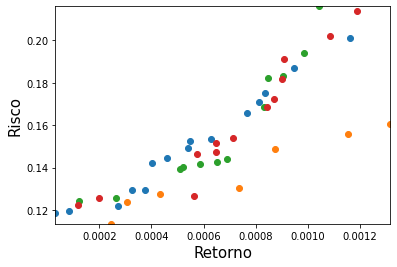

In [ ]:
# TAM_POP, GERACOES, RODADAS
main(100, 10, 4)

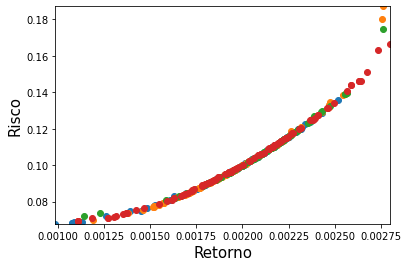

In [ ]:
# TAM_POP, GERACOES, RODADAS
main(100, 200, 4)